<a href="https://colab.research.google.com/github/Omonov01/DataScienseProject/blob/main/Object_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fastai==2.5.3

In [ ]:
import fastai
import torch
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [ ]:
from fastai.vision.all import *
import numpy as np
from ipywidgets import widgets

path = untar_data(URLs.CAMVID_TINY)
path.ls()

#label_getter
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

dls =SegmentationDataLoaders.from_label_func(path,bs=8, fnames=get_image_files(path/'images'),
                                             label_func=label_getter,
                                             codes=np.loadtxt(path/'codes.txt' , dtype = str))

#datalearn
learn = unet_learner(dls,resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.230716,2.237211,00:03


epoch,train_loss,valid_loss,time
0,1.930725,1.473911,00:04
1,1.635094,1.211762,00:04
2,1.435701,1.284661,00:04
3,1.408984,1.167445,00:04
4,1.295897,1.082466,00:04
5,1.181150,0.899618,00:04
6,1.071592,0.831935,00:04
7,0.971747,0.819537,00:04
8,0.890941,0.790089,00:04
9,0.821992,0.770619,00:05


In [ ]:
#!ls '/root/.fastai/data/camvid_tiny/labels'

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


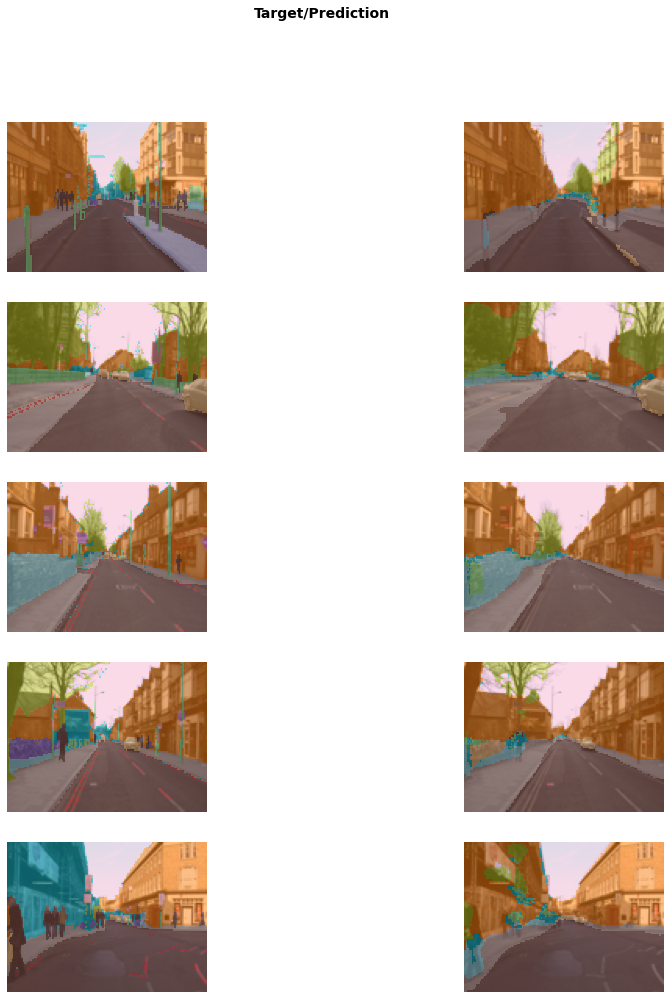

In [ ]:
learn.show_results(max_n=5,figsize=(15,16))

In [ ]:
learn.export("object_segmentation_model.pkl")